<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab3/blob/main/6351071071_LAB3_Bai3(Trang7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Câu d

In [1]:
print("Nguyễn Hữu Toàn – 6351071071")

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Đọc dữ liệu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Chuẩn hóa pixel về [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Định nghĩa hàm tạo model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Kiểm tra tạo model
model = create_model()
model.summary()


Nguyễn Hữu Toàn – 6351071071
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#Câu e

In [2]:
print("Nguyễn Hữu Toàn – 6351071071")

from sklearn.model_selection import KFold

# --- Thiết lập KFold ---
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

models = []
accuracy_per_fold = []
loss_per_fold = []

fold_no = 1
for train_index, val_index in kf.split(train_images):
    print(f"--- Fold {fold_no} ---")

    # Chia train/validation cho fold hiện tại
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    # Khởi tạo model mới cho fold
    model = create_model()

    # Huấn luyện
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=5,
        batch_size=32,
        verbose=1
    )

    # Đánh giá trên tập validation của fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {scores[0]:.4f}, Accuracy: {scores[1]:.4f}\n")

    # Lưu model và kết quả
    models.append(model)
    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])

    fold_no += 1

Nguyễn Hữu Toàn – 6351071071
--- Fold 1 ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8511 - loss: 0.5077 - val_accuracy: 0.9602 - val_loss: 0.1396
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9546 - loss: 0.1586 - val_accuracy: 0.9695 - val_loss: 0.1052
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9659 - loss: 0.1175 - val_accuracy: 0.9757 - val_loss: 0.0854
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9721 - loss: 0.0907 - val_accuracy: 0.9787 - val_loss: 0.0785
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9757 - loss: 0.0777 - val_accuracy: 0.9775 - val_loss: 0.0826
Fold 1 - Loss: 0.0826, Accuracy: 0.9775

--- Fold 2 ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8514 - loss: 0.5057 - val_accuracy: 0.9522 - val_loss: 0.1631
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9538 - loss: 0.1543 - val_accuracy: 0.9633 - val_loss:

#Câu f

In [3]:
print("Nguyễn Hữu Toàn – 6351071071")

import numpy as np

# Tính Mean & Std Accuracy
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)

# Tính Mean & Std Loss
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

# In kết quả
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Std Accuracy: {std_accuracy:.4f}")
print(f"Mean Loss: {mean_loss:.4f}")
print(f"Std Loss: {std_loss:.4f}")

Nguyễn Hữu Toàn – 6351071071
Mean Accuracy: 0.9747
Std Accuracy: 0.0024
Mean Loss: 0.0845
Std Loss: 0.0069


#Câu g

Nguyễn Hữu Toàn – 6351071071


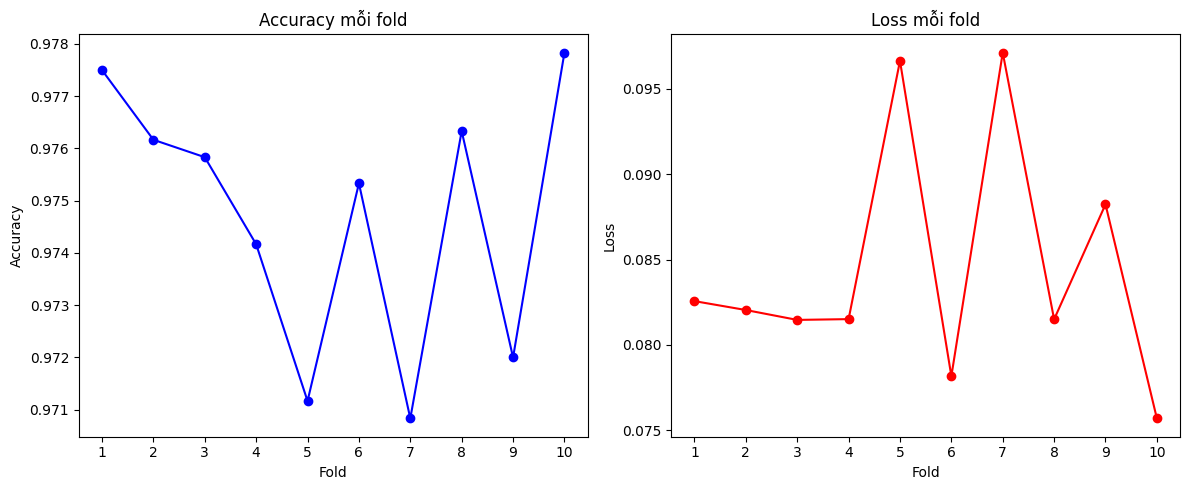

In [4]:
print("Nguyễn Hữu Toàn – 6351071071")

import matplotlib.pyplot as plt

folds = range(1, len(accuracy_per_fold)+1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(folds, accuracy_per_fold, marker='o', linestyle='-', color='blue')
plt.title("Accuracy mỗi fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(folds)

# Loss
plt.subplot(1,2,2)
plt.plot(folds, loss_per_fold, marker='o', linestyle='-', color='red')
plt.title("Loss mỗi fold")
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.xticks(folds)

plt.tight_layout()
plt.show()

#Câu h

In [5]:
print("Nguyễn Hữu Toàn – 6351071071")

# Tìm index của fold có Accuracy cao nhất
best_index = np.argmax(accuracy_per_fold)
best_model = models[best_index]

print(f"Model tốt nhất là fold {best_index+1} với Accuracy = {accuracy_per_fold[best_index]:.4f}")

# Dự đoán tập test
y_pred_probs = best_model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Dự đoán test hoàn tất!")

Nguyễn Hữu Toàn – 6351071071
Model tốt nhất là fold 10 với Accuracy = 0.9778
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Dự đoán test hoàn tất!


#Câu i

In [6]:
print("Nguyễn Hữu Toàn – 6351071071")

from sklearn.metrics import accuracy_score

# Tính Accuracy
test_accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy trên tập test: {test_accuracy:.4f}")

Nguyễn Hữu Toàn – 6351071071
Accuracy trên tập test: 0.9767


#Câu j

In [7]:
print("Nguyễn Hữu Toàn – 6351071071")

from sklearn.metrics import classification_report

# In báo cáo classification report
report = classification_report(test_labels, y_pred)
print("Classification Report:\n")
print(report)

Nguyễn Hữu Toàn – 6351071071
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#Câu k

Nguyễn Hữu Toàn – 6351071071


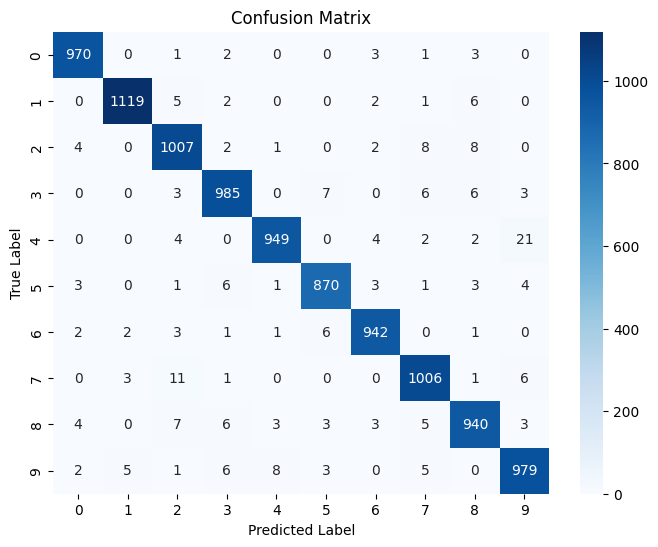

In [8]:
print("Nguyễn Hữu Toàn – 6351071071")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tính confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Câu l

Nguyễn Hữu Toàn – 6351071071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


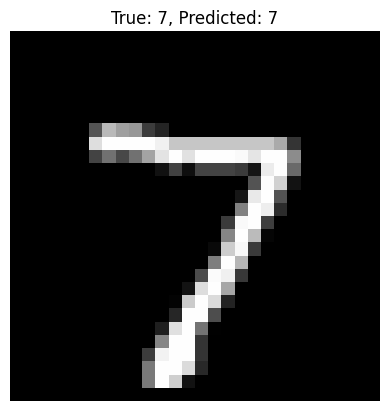

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


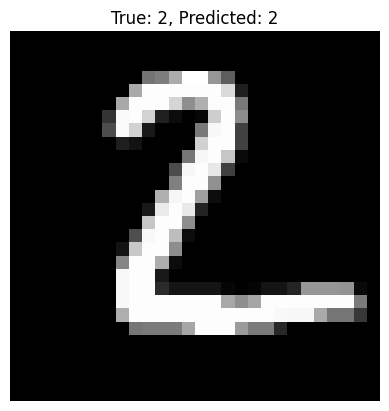

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


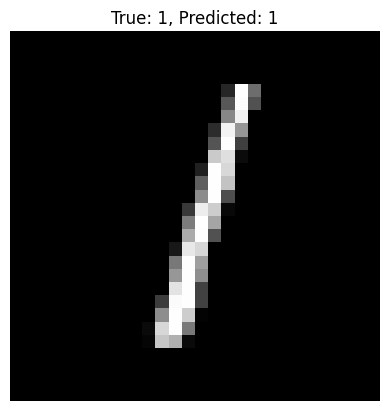

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


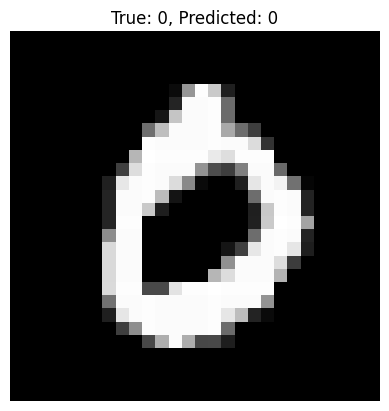

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


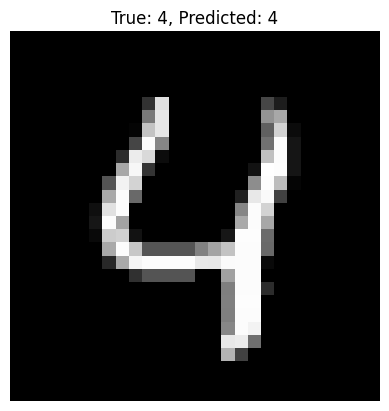

In [9]:
print("Nguyễn Hữu Toàn – 6351071071")

for i in range(5):
    # Lấy ảnh
    img = np.expand_dims(test_images[i], axis=0)  # shape (1,28,28)

    # Dự đoán
    pred_prob = best_model.predict(img)
    pred_label = np.argmax(pred_prob)

    # Hiển thị ảnh
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {pred_label}")
    plt.axis('off')
    plt.show()